# K-means clustering: Mexican Earthquakes

Earthquakes are interesting example to make use of the K-means algorithm. 
Let's apply this technique and find earthquakes' clusters on our Mexican dataset.

K-means is method that looks to partition a set of observations into groups, in which each observation belongs to the group with the closest mean value.


In [28]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

### Our data set is taken from the Servicio Sismológico Nacional

The data we have is from the Servicio Sismológico Nacional and comprises of all earthquakes occurred in Mexico from 1900 until March 2023.

México. Universidad Nacional Autónoma de México, I. d. G., Servicio Sismológico Nacional. (2023). Catálogo de sismos. Extraído de http://www2.ssn.unam.mx:8080/catalogo/

In [2]:
types_dict = {'Fecha':str, 'Hora':str, 'Magnitud':float, 'Latitud':float, 'Longitud':float, 
              'Profundidad':float,'Referencia de localizacion':str, 'Fecha UTC':str, 
              'Hora UTC':str, 'Estatus':str}
date=['Fecha']
df_mexearthquake = pd.read_csv('SSNMX_catalogo.csv', dtype=types_dict, parse_dates=date)
df_mexearthquake.head(3)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,1900-01-20,00:33:30,7.4,20.0,-105.0,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-01-20,06:33:30,revisado
1,1900-05-16,14:12:00,6.9,20.0,-105.0,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-05-16,20:12:00,revisado
2,1901-03-05,04:45:00,6.9,25.0,-110.0,33.0,"100 km al NORESTE de LA PAZ, BCS",1901-03-05,10:45:00,revisado


### For this analysis, we will only look at earthquakes with a magnitude > 5.0

In [19]:
mag5indices= np.where(df_mexearthquake['Magnitud']>=5)  
df_mag5 = df_mexearthquake.loc[mag5indices] #dataframe with magnitude > 5.0
df_mag5 = df_mag5[['Latitud','Longitud']]
df_mag5.head(3)

,Latitud,Longitud
0,20.0,-105.0
1,20.0,-105.0
2,25.0,-110.0


### As we mentioned before, we are looking to divide our earthquakes into several clusters. But how many clusters are we going to have? We can solve this issue with Elbow Method

 This method is a plots the number of possible clusters agains the sum of squared errors of the model.
    


In [20]:
SSE = [] # Sum of Squared errors
K = range(1,10) # Number of clusters
for k in K:
    kmeanm = KMeans(n_clusters=k)
    kmeanm = kmeanm.fit(df_mag5)    
    SSE.append(kmeanm.inertia_) #Add the SE

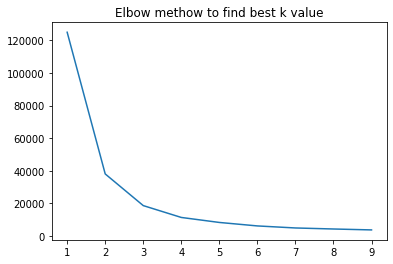

In [21]:
sns.lineplot(x=K, y=SSE)
plt.title('Elbow methow to find best k value')
plt.show()

From this plot we will choose a n_cluster = 3

In [22]:
kmeanm = KMeans(n_clusters=3) 
kmeanm = kmeanm.fit(df_mag5)

Text(0.5, 1.0, 'Clustering')

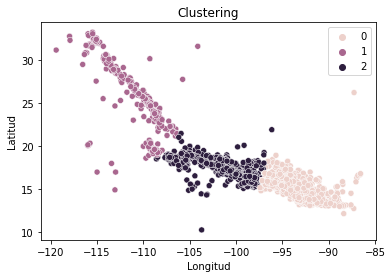

In [23]:
sns.scatterplot(data=df_mag5, x='Longitud', y='Latitud' 
                , hue=kmeanm.labels_)
plt.title('Clustering')

### We observe the difference between the means on the dataframe given the standard deviation. So let's scale the data

In [27]:
df_mag5.describe() #Obtaining the means and std

,Latitud,Longitud
count,1783.000000,1783.000000
mean,17.712235,-99.252108
std,4.400665,7.124170
min,10.271000,-119.415000
25%,14.802850,-104.650000
50%,16.350000,-98.090000
75%,18.495000,-93.211400
max,33.265800,-86.560000


In [29]:
stdscaler = StandardScaler() #We use Standard Scaler to scale the data
scaleddata = stdscaler.fit_transform(df_mag5)

#### We obtain the number of cluster using the Elbow method again

In [30]:
SSEsd = [] # Sum of Squared errors
K = range(1,10) # Number of clusters
for k in K:
    kmeanmsd = KMeans(n_clusters=k)
    kmeanmsd = kmeanmsd.fit(scaleddata) #We know use the scaled data   
    SSEsd.append(kmeanmsd.inertia_) #Add the SE

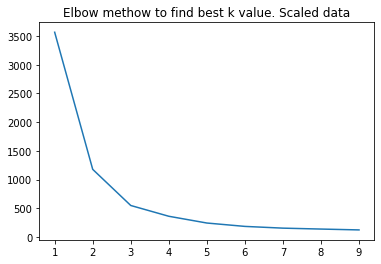

In [31]:
sns.lineplot(x=K, y=SSEsd)
plt.title('Elbow methow to find best k value. Scaled data')
plt.show()

#### We still choose n_clusters = 3

In [32]:
kmeanmsd = KMeans(n_clusters=3) 
kmeanmsd = kmeanmsd.fit(scaleddata)

### Let's plot these two results side by side

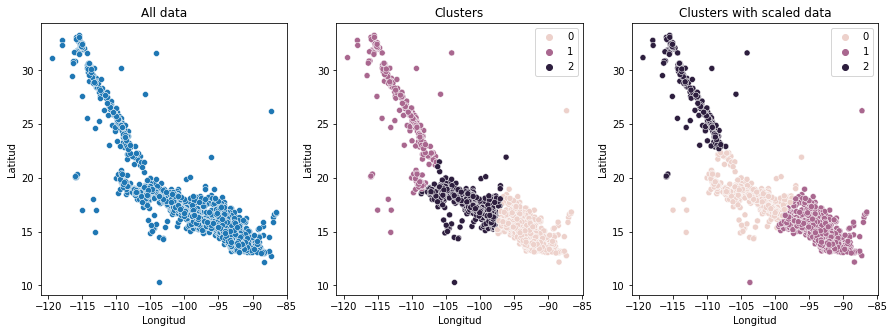

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.scatterplot(ax=axes[0],  x=df_mag5.Longitud, y=df_mag5.Latitud).set_title('All data')
sns.scatterplot(ax=axes[1],  x=df_mag5.Longitud, y=df_mag5.Latitud, hue=kmeanm.labels_).set_title('Clusters')
sns.scatterplot(ax=axes[2],  x=df_mag5.Longitud, y=df_mag5.Latitud, hue=kmeanmsd.labels_).set_title('Clusters with scaled data');

### Let's finish the notebook with a map of these clusters

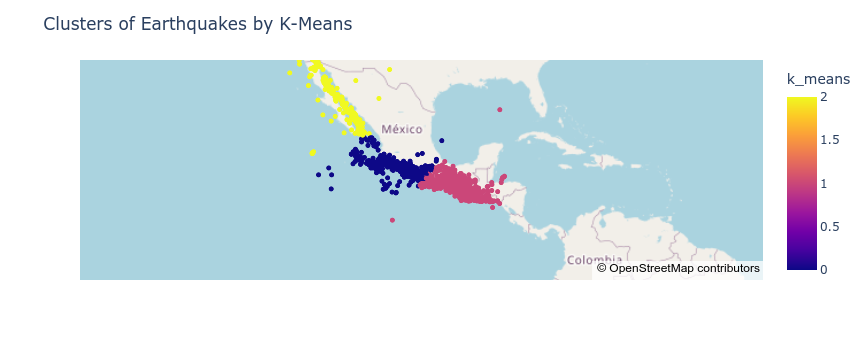

In [57]:
fig= px.scatter_mapbox(df_mag5, lat="Latitud", lon="Longitud", mapbox_style="open-street-map", 
                        zoom = 2.2, color='k_means')
fig.update_layout(
    title='Clusters of Earthquakes by K-Means')
fig.show()


The three clusters we found seem to correspond to the different tectonic plates that lie beneath Mexico.
The earthquakes part of Cluster 2 correspond to the seismic activity due to the interactions between the North American and the Pacific Plate. For Cluster 1, we may infer is caused by the Orozco and Riviera Plate  motions. And finally, the collision of the Cocos plate and the North American plate matches the earthquakes of Cluster 0. 